# Datensätze


Dataset: Codebench
Total datapoints: 2768
Emotion distribution: {'anger': 333, 'fear': 1611, 'joy': 674, 'sadness': 878, 'surprise': 839, 'disgust': 0, 'none': 239}
anger: 333 (12%)
fear: 1611 (58%)
joy: 674 (24%)
sadness: 878 (32%)
surprise: 839 (30%)
disgust: 0 (0%)
none: 239 (9%)

Dataset: Dair-AI
Total datapoints: 239777
Emotion distribution: {'anger': 57317, 'fear': 47712, 'joy': 59888, 'sadness': 59888, 'surprise': 14972, 'disgust': 0, 'none': 0}
anger: 57317 (24%)
fear: 47712 (20%)
joy: 59888 (25%)
sadness: 59888 (25%)
surprise: 14972 (6%)
disgust: 0 (0%)
none: 0 (0%)

Dataset: Emotions-Data
Total datapoints: 981335
Emotion distribution: {'anger': 293537, 'fear': 18499, 'joy': 471144, 'sadness': 151693, 'surprise': 9762, 'disgust': 4502, 'none': 32198}
anger: 293537 (30%)
fear: 18499 (2%)
joy: 471144 (48%)
sadness: 151693 (15%)
surprise: 9762 (1%)
disgust: 4502 (0%)
none: 32198 (3%)

Dataset: Go-Emotions
Total datapoints: 90698
Emotion distribution: {'anger': 8084, 'fear': 3197

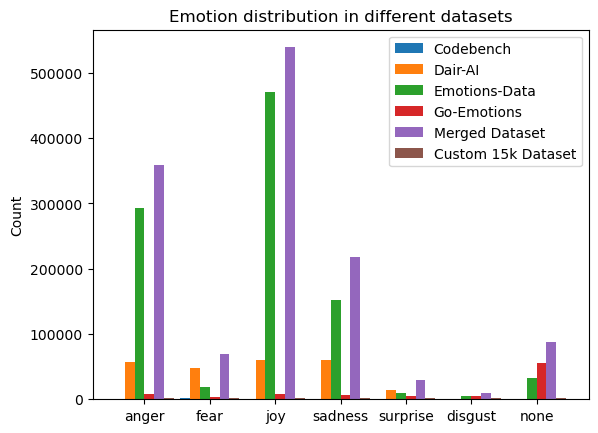

In [9]:
import json

from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Dataset:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path
        self.data = self.load_data()
        self.emotion_counter = {}
        for emotion in EMOTION_LABELS:
            self.emotion_counter[emotion] = 0

    def load_data(self):
        with open(self.path) as f:
            data = json.load(f)
        return data


datasets: list[Dataset] = []

datasets.append(Dataset("Codebench", "data/codabench_data/train/eng_a_parsed.json"))
datasets.append(Dataset("Dair-AI", "data/dair-ai/parsed_data.json"))
datasets.append(
    Dataset("Emotions-Data", "data/Emotions_Data/parsed_data_unpruned.json")
)
datasets.append(Dataset("Go-Emotions", "data/go_emotions/parsed_data.json"))
datasets.append(Dataset("Merged Dataset", "data/merged_data.json"))
datasets.append(Dataset("Custom 15k Dataset", "data/data_15k.json"))


for dataset in datasets:
    print("\nDataset:", dataset.name)
    for entry in dataset.data:
        for emotion in entry["emotions"]:
            dataset.emotion_counter[emotion] += 1

    print("Total datapoints:", len(dataset.data))
    print("Emotion distribution:", dataset.emotion_counter)

    sum = len(dataset.data)
    for emotion in dataset.emotion_counter:
        percentage = round(dataset.emotion_counter[emotion] / sum * 100, None)
        print(f"{emotion}: {dataset.emotion_counter[emotion]} ({percentage}%)")


# display the distribution of the emotions for each dataset as a single bar chart
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(EMOTION_LABELS))

for i, dataset in enumerate(datasets):
    emotion_counts = [dataset.emotion_counter[emotion] for emotion in EMOTION_LABELS]
    ax.bar(index + i * bar_width, emotion_counts, bar_width, label=dataset.name)

ax.set_ylabel("Count")
ax.set_title("Emotion distribution in different datasets")
ax.set_xticks(index + bar_width * 2.5)
ax.set_xticklabels(EMOTION_LABELS)
ax.legend()
plt.show()

# save under name "distribution.png"
# plt.savefig("distribution.png")
# FIXME


In [3]:
import json


PATH = "data/codabench_data/train/eng_b_parsed.json"

emotions = set()

with open(PATH) as f:
    data = json.load(f)

    for entry in data:
        for emotion in entry["emotions"]:
            emotions.add(emotion)

print(sorted(list(emotions)))

['light anger', 'light fear', 'light joy', 'light sadness', 'light surprise', 'medium anger', 'medium fear', 'medium joy', 'medium sadness', 'medium surprise', 'none', 'strong anger', 'strong fear', 'strong joy', 'strong sadness', 'strong surprise']


# Only SemEval


Dataset: Codebench
Total datapoints: 2768
Emotion distribution: {'anger': 333, 'fear': 1611, 'joy': 674, 'sadness': 878, 'surprise': 839, 'disgust': 0, 'none': 239}
anger: 333 (12.03%)
fear: 1611 (58.2%)
joy: 674 (24.35%)
sadness: 878 (31.72%)
surprise: 839 (30.31%)
disgust: 0 (0.0%)
none: 239 (8.63%)


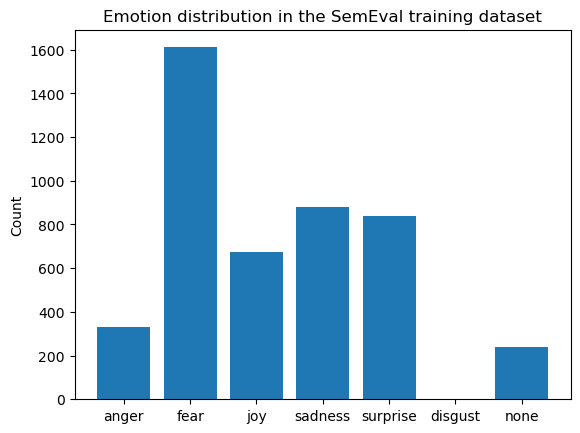

In [6]:
import json

from common import EMOTION_LABELS
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa


class Dataset:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path
        self.data = self.load_data()
        self.emotion_counter = {}
        for emotion in EMOTION_LABELS:
            self.emotion_counter[emotion] = 0

    def load_data(self):
        with open(self.path) as f:
            data = json.load(f)
        return data


dataset = Dataset("Codebench", "data/codabench_data/train/eng_a_parsed.json")


print("\nDataset:", dataset.name)
for entry in dataset.data:
    for emotion in entry["emotions"]:
        dataset.emotion_counter[emotion] += 1

print("Total datapoints:", len(dataset.data))
print("Emotion distribution:", dataset.emotion_counter)

sum = len(dataset.data)
for emotion in dataset.emotion_counter:
    percentage = round(dataset.emotion_counter[emotion] / sum * 100, 2)
    print(f"{emotion}: {dataset.emotion_counter[emotion]} ({percentage}%)")


# display the distribution of the emotions for each dataset as a bar chart
fig, ax = plt.subplots()
index = np.arange(len(dataset.emotion_counter))
emotion_counts = [
    dataset.emotion_counter[emotion] for emotion in dataset.emotion_counter
]
ax.bar(index, emotion_counts)
ax.set_xticks(index)
ax.set_xticklabels(dataset.emotion_counter.keys())
ax.set_ylabel("Count")
ax.set_title("Emotion distribution in the SemEval training dataset")


# save under name "distribution.png"
plt.savefig("distribution-semeval.png")

plt.show()
